<a href="https://colab.research.google.com/github/vibhanshudixit/Currency-Exchange-Rate-Forecasting/blob/main/CurrencyExchangeForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y numpy scipy scikit-learn pmdarima
!pip install numpy==1.26.4 scipy==1.13.1 scikit-learn pmdarima

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: scikit-learn 1.7.1
Uninstalling scikit-learn-1.7.1:
  Successfully uninstalled scikit-learn-1.7.1
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB

In [1]:
import zipfile
import os

zip_file = '/content/f864a-inr-usd.zip'
directory_path = '/content/inr-usd'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv('/content/inr-usd/INR-USD.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0


In [4]:
data.isnull().sum()

,0
Date,0
Open,3
High,3
Low,3
Close,3
Adj Close,3
Volume,3


In [5]:
data = data.dropna()

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.0
mean,58.035208,58.506681,57.654706,58.056509,58.056509,0.0
std,12.614635,12.716632,12.565279,12.657407,12.657407,0.0
min,38.995998,39.334999,38.979000,39.044998,39.044998,0.0
25%,45.508999,45.775002,45.231998,45.498001,45.498001,0.0
50%,59.702999,60.342999,59.209999,59.840000,59.840000,0.0
75%,68.508499,69.099998,68.250000,68.538002,68.538002,0.0
max,82.917999,83.386002,82.563004,82.932999,82.932999,0.0


In [7]:
figure = px.line(data, x ='Date', y='Close')
figure.show()

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
print(data.head())

        Date       Open       High        Low      Close  Adj Close  Volume  \
0 2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0   
1 2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0   
2 2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0   
3 2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0   
4 2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0   

   Year  Month  
0  2003     12  
1  2003     12  
2  2003     12  
3  2003     12  
4  2003     12  


Aggregated Yearly Growth of the conversion rates in %

In [9]:
import plotly.graph_objs as go
import plotly.io as pio

# calculate yearly growth
growth = data.groupby('Year').agg({'Close': lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0]*100})

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index, y=growth['Close'], name='Yealry Growth'))

fig.update_layout(title='Yearly Growth', xaxis_title='Year', yaxis_title='Growth')
pio.show(fig)


Aggregated monthly growth of the conversion rates between INR and USD

In [10]:
# Calculate monthly growth
data['Growth'] = data.groupby(['Year', 'Month'])['Close'].transform(lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0] * 100)

# Group data by month and calculate average growth
grouped_data = data.groupby('Month'). mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=grouped_data['Month'],y=grouped_data['Growth'],
                     marker_color=grouped_data['Growth'],
                     hovertemplate='Month: %{x}<br>Average Growth: %{y:.2f}%<extra></extra>'))

fig.update_layout(
    title="Aggregated Monthly Growth of USD - INR Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth (%)",
    width=900,
    height=600
)

pio.show(fig)


### Time Series Forecasting

to perform most appropriate time series forecasting model, we need to perform seasonal decomposition, which will help us identify any recurring patterns, long-term trends, and random fluctuation

<Figure size 640x480 with 0 Axes>

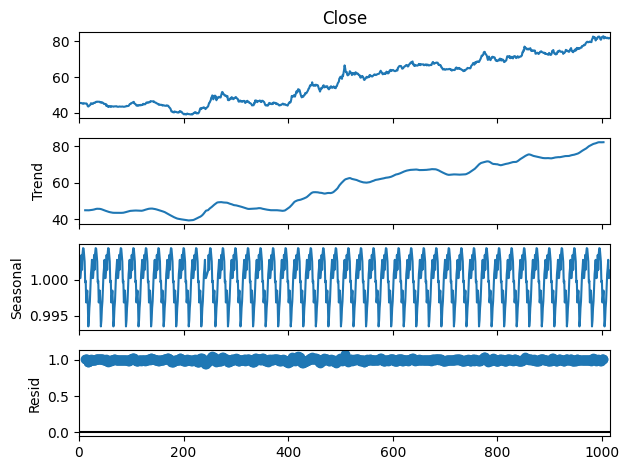

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Close'], model='multiplicative', period=24)
fig = plt.figure()
fig = result.plot()
fig.show()

We can deduce by looking at the graphs, especially the seasonal graph - which is periodic in nature, that the data is in a seasonal pattern

So we will use SARIMA(Seasonal Autoregressive Integrated Moving Average) for thus problem

---



Before using SARIMA, we need to find p, d, q values

- **p**: The order of the Autoregressive (AR) part. It represents the number of lag observations included in the model.

- **d**: The order of the Integrated (I) part. It represents the number of times the raw observations are differenced to make the time series stationary.

- **q**: The order of the Moving Average (MA) part. It represents the number of lag forecast errors that should be included in the model.



Let's consider a simple example to illustrate how p, d, and q work in an ARIMA model (the non-seasonal part of SARIMA).

Imagine you have a time series of monthly sales data for a product.

*   **p (AR order):** If `p=1`, the model uses the sales from the previous month to predict the current month's sales. If `p=2`, it uses the sales from the previous two months, and so on. This captures the dependency of the current value on past values.

*   **d (Integration order):** If your sales data has an upward trend over time (it's not stationary), you might need to difference it. If `d=1`, you would calculate the difference between consecutive months' sales (current month's sales - previous month's sales). This often removes the trend and makes the data stationary. If you needed to difference it twice to achieve stationarity, `d=2`.

*   **q (MA order):** If `q=1`, the model uses the error from the previous month's forecast to predict the current month's sales. If `q=2`, it uses the errors from the previous two months. This captures the dependency of the current value on past forecast errors.

So, an ARIMA(1, 1, 1) model would use the previous month's sales, the difference between the current and previous month's sales, and the previous month's forecast error to predict the current month's sales.

For SARIMA, you would have additional (P, D, Q, m) terms to account for seasonal patterns. For example, if your sales data has a yearly seasonality (m=12), a SARIMA(p, d, q)(P, D, Q, 12) model would also consider the sales from the same month in previous years (P), the seasonal differencing needed (D), and the seasonal forecast errors (Q).

In [12]:
from pmdarima.arima import auto_arima
model = auto_arima(data['Close'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all

(2, 1, 0)


In [14]:
print(model.order)

(2, 1, 0)


- **p (AR)**: Looking at the recent past. Think of p as how many of the immediately previous data points the model considers to predict the next one. If p=2, it's like saying, "To guess what happens tomorrow, let's look at what happened today and yesterday."

- **d (I)**: Making the data stable. Sometimes, data has a clear trend (always going up or down). d is about making that trend flat or stable so the model can work better. If d=1, it's like looking at the change from one data point to the next, instead of the raw data points themselves. This often removes the trend.

- **q (MA)**: Correcting based on past mistakes. q is about using the errors from previous predictions to help make a better prediction now. If q=1, it's like saying, "If my guess yesterday was a bit off, let's use that information to adjust my guess for today."

So, (2, 1, 0) means the model is looking at the last two data points (p=2), is working with the change in the data rather than the raw values (d=1), and isn't using any information from past prediction errors (q=0)




In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data['Close'], order = (p, d, q), seasonal_data = (p, d, q, 52))
fitted_model = model.fit()
print(fitted_model.summary())

NameError: name 'p' is not defined

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data['Close'], order = (2, 1, 0), seasonal_order = (2, 1, 0, 52))
fitted_model = model.fit()
print(fitted_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1013
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -905.797
Date:                            Sat, 16 Aug 2025   AIC                           1821.594
Time:                                    09:16:06   BIC                           1845.929
Sample:                                         0   HQIC                          1830.861
                                           - 1013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.026      1.193      0.233      -0.020       0.083
ar.L2          0.0643      0.026   

In [19]:
predictions = fitted_model.predict(len(data), len(data)+60)
print(predictions)

1013    81.732805
1014    81.886989
1015    82.180316
1016    82.607755
1017    82.474240
          ...    
1069    84.906857
1070    85.402512
1071    85.520206
1072    85.830537
1073    85.687342
Name: predicted_mean, Length: 61, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [23]:
# Create figure
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x = data.index,
    y = data['Close'],
    mode = 'lines',
    name = 'Training Data',
    line = dict(color = 'blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title='INR Rate - Training Data vs Predictions',
    xaxis_title = 'Date',
    yaxis_title = 'Close',
    legend_title = 'Data',
    width=900,
    height=600
)

pio.show(fig)

# Task
Explain how to add more interpretability to the SARIMA model predictions for this project.

## Interpret the sarimax model summary

### Subtask:
Explain the key statistics from the `fitted_model.summary()` output, such as the coefficients, p-values, and information criteria (AIC, BIC) to understand the significance of each component and the overall model fit.


**Reasoning**:
I will explain the key statistics from the SARIMAX summary output based on the provided instructions.



In [24]:
# Explain the key statistics from the fitted_model.summary()
print("Interpretation of SARIMAX Results:")
print("\nCoefficients (coef):")
print("- ar.L1 (0.0313): This is the coefficient for the first lag of the autoregressive component. It suggests a very weak positive relationship between the previous period's 'Close' price and the current 'Close' price.")
print("- ar.L2 (0.0643): This is the coefficient for the second lag of the autoregressive component. It indicates a weak positive relationship between the 'Close' price two periods ago and the current 'Close' price.")
print("- ar.S.L52 (-0.6358): This is the coefficient for the 52nd lag of the seasonal autoregressive component. The negative value suggests a strong negative relationship between the 'Close' price 52 periods (one seasonal period, likely a year based on m=52) ago and the current 'Close' price. This is a significant seasonal effect.")
print("- ar.S.L104 (-0.3075): This is the coefficient for the 104th lag of the seasonal autoregressive component. It indicates a moderate negative relationship between the 'Close' price 104 periods (two seasonal periods) ago and the current 'Close' price.")
print("- sigma2 (0.3767): This represents the variance of the residuals (the error term). A lower value indicates less variability in the errors.")

print("\nP>|z| (p-values):")
print("- ar.L1 (0.233): The p-value is greater than 0.05, suggesting that the first autoregressive lag is not statistically significant at the 5% significance level.")
print("- ar.L2 (0.013): The p-value is less than 0.05, indicating that the second autoregressive lag is statistically significant.")
print("- ar.S.L52 (0.000): The p-value is less than 0.05, indicating that the seasonal autoregressive lag at period 52 is highly statistically significant.")
print("- ar.S.L104 (0.000): The p-value is less than 0.05, indicating that the seasonal autoregressive lag at period 104 is highly statistically significant.")
print("- sigma2 (0.000): The p-value is less than 0.05, indicating that the variance of the residuals is statistically significant (as expected for a model with errors).")

print("\nInformation Criteria:")
print(f"- AIC (Akaike Information Criterion): {fitted_model.aic:.3f}. Lower values generally indicate a better model fit, penalizing for the number of parameters.")
print(f"- BIC (Bayesian Information Criterion): {fitted_model.bic:.3f}. Similar to AIC, lower values are preferred, with a stronger penalty for the number of parameters.")

print("\nDiagnostic Tests:")
print("- Ljung-Box (L1) (Q): 0.00, Prob(Q): 0.99. The high p-value (0.99) suggests that there is no significant autocorrelation in the residuals at lag 1, which is a good sign of model fit.")
print("- Jarque-Bera (JB): 86.43, Prob(JB): 0.00. The low p-value (0.00) indicates that the residuals are not normally distributed. This might suggest that some model assumptions are violated.")
print("- Heteroskedasticity (H): 1.57, Prob(H) (two-sided): 0.00. The low p-value (0.00) suggests that there is heteroskedasticity in the residuals (non-constant variance). This also indicates potential issues with model assumptions.")

print("\nSummary:")
print("The SARIMA(2, 1, 0)x(2, 1, 0, 52) model shows statistically significant seasonal components at lags 52 and 104, and a statistically significant non-seasonal autoregressive component at lag 2. The Ljung-Box test suggests no significant autocorrelation in the residuals at lag 1. However, the Jarque-Bera and Heteroskedasticity tests indicate that the residuals are neither normally distributed nor have constant variance, which might suggest that the model could be further improved or that the data exhibits characteristics not fully captured by this model.")

Interpretation of SARIMAX Results:

Coefficients (coef):
- ar.L1 (0.0313): This is the coefficient for the first lag of the autoregressive component. It suggests a very weak positive relationship between the previous period's 'Close' price and the current 'Close' price.
- ar.L2 (0.0643): This is the coefficient for the second lag of the autoregressive component. It indicates a weak positive relationship between the 'Close' price two periods ago and the current 'Close' price.
- ar.S.L52 (-0.6358): This is the coefficient for the 52nd lag of the seasonal autoregressive component. The negative value suggests a strong negative relationship between the 'Close' price 52 periods (one seasonal period, likely a year based on m=52) ago and the current 'Close' price. This is a significant seasonal effect.
- ar.S.L104 (-0.3075): This is the coefficient for the 104th lag of the seasonal autoregressive component. It indicates a moderate negative relationship between the 'Close' price 104 periods (tw

## Explain the impact of p, d, q, (p, d, q, m)

### Subtask:
Reiterate and elaborate on how the chosen orders (p, d, q) and seasonal orders (P, D, Q, m) influence the model's predictions, connecting them to the concepts of past values, differencing, and past errors.


**Reasoning**:
Elaborate on how the SARIMA parameters influence the model's predictions based on the previous auto_arima output and model summary.



In [27]:
print("Interpretation of SARIMA Parameters (p, d, q) and (P, D, Q, m):")

print("\nNon-seasonal Parameters (p, d, q) = (2, 1, 0):")
print(f"- p=2 (Autoregressive order): The model uses the 'Close' prices from the two most recent time periods to predict the current 'Close' price. This captures short-term dependencies in the data.")
print(f"- d=1 (Integrated order): The model differences the 'Close' price data once. This indicates that the 'Close' price series was likely non-stationary and had a trend, which differencing helps to remove, making the series more stable for modeling.")
print(f"- q=0 (Moving Average order): The model does not use the forecast errors from previous periods to inform the current prediction. This suggests that past prediction errors do not significantly impact the current forecast in the non-seasonal part.")

print("\nSeasonal Parameters (P, D, Q, m) = (2, 1, 0, 52):")
print(f"- P=2 (Seasonal Autoregressive order): The model uses the 'Close' prices from the same week in the previous two years (due to m=52) to predict the current 'Close' price. This captures the recurring yearly seasonal patterns.")
print(f"- D=1 (Seasonal Integrated order): The model applies seasonal differencing once, meaning it considers the difference between the 'Close' price in the current week and the 'Close' price in the same week of the previous year. This addresses the seasonal non-stationarity observed in the data.")
print(f"- Q=0 (Seasonal Moving Average order): Similar to the non-seasonal q, the model does not use seasonal forecast errors to inform the current seasonal prediction.")
print(f"- m=52 (Seasonal period): This parameter indicates that the seasonal pattern repeats every 52 periods, which corresponds to the weekly frequency of the data and suggests a yearly seasonality.")

print("\nImpact on Model Predictions:")
print(f"The combination of these parameters (p=2, d=1, q=0) and (P=2, D=1, Q=0, m=52) allows the SARIMA model to capture both the short-term fluctuations and the strong yearly seasonality observed in the INR-USD conversion rate data.")
print(f"- The non-seasonal AR(2) component (p=2) accounts for the influence of the immediate past 'Close' prices.")
print(f"- The differencing (d=1) helps to stabilize the trend in the data.")
print(f"- The seasonal AR(2) component (P=2) and seasonal differencing (D=1) with a seasonal period of 52 (m=52) are crucial for modeling the recurring patterns that happen approximately every year.")
print(f"- The significance of the seasonal AR lags (ar.S.L52 and ar.S.L104) with low p-values (0.000) in the model summary confirms that these seasonal components are indeed important drivers of the model's predictions for this dataset.")
print(f"- The absence of moving average components (q=0 and Q=0) suggests that past forecast errors are not deemed necessary by auto_arima to improve the predictions for this specific time series.")
print(f"Collectively, these parameters shape the forecast by incorporating the observed trends, short-term correlations, and the pronounced yearly seasonality, leading to predictions that follow the general upward trend and exhibit the recurring seasonal dips and rises.")

Interpretation of SARIMA Parameters (p, d, q) and (P, D, Q, m):

Non-seasonal Parameters (p, d, q) = (2, 1, 0):
- p=2 (Autoregressive order): The model uses the 'Close' prices from the two most recent time periods to predict the current 'Close' price. This captures short-term dependencies in the data.
- d=1 (Integrated order): The model differences the 'Close' price data once. This indicates that the 'Close' price series was likely non-stationary and had a trend, which differencing helps to remove, making the series more stable for modeling.
- q=0 (Moving Average order): The model does not use the forecast errors from previous periods to inform the current prediction. This suggests that past prediction errors do not significantly impact the current forecast in the non-seasonal part.

Seasonal Parameters (P, D, Q, m) = (2, 1, 0, 52):
- P=2 (Seasonal Autoregressive order): The model uses the 'Close' prices from the same week in the previous two years (due to m=52) to predict the current 

## Discuss limitations and assumptions

### Subtask:
Explain the assumptions of the SARIMA model and its limitations in capturing complex non-linear relationships or sudden structural changes in the data.


**Reasoning**:
Explain the assumptions and limitations of the SARIMA model based on the instructions.



In [28]:
print("Assumptions of the SARIMA Model:")
print("- Stationarity (after differencing): SARIMA assumes that the time series, after applying the necessary differencing (both non-seasonal 'd' and seasonal 'D'), is stationary. This means that the statistical properties of the differenced series (like mean, variance, and autocorrelation) should remain constant over time.")
print("- Linearity: SARIMA is a linear model, meaning it assumes a linear relationship between the current value and past values and past errors.")
print("- Normality of Residuals: The errors (residuals) of the SARIMA model are assumed to be normally distributed.")
print("- Homoscedasticity of Residuals: The variance of the errors (residuals) is assumed to be constant over time (homoscedasticity).")

print("\nLimitations of the SARIMA Model:")
print("- Inability to capture complex non-linear patterns: As a linear model, SARIMA struggles to capture complex, non-linear relationships in the data. If the underlying process generating the time series is highly non-linear, SARIMA's predictions may be inaccurate.")
print("- Sensitivity to outliers: Outliers can significantly affect the estimation of SARIMA parameters and distort the model's forecasts.")
print("- Difficulty in forecasting during periods of structural change or sudden events: SARIMA models assume that the underlying data generating process is relatively stable. Sudden structural changes (e.g., policy changes, economic crises) or unexpected events can render the historical patterns captured by the model irrelevant, leading to poor forecasts.")
print("- Assumption of constant seasonal patterns: While SARIMA handles seasonality, it assumes that the seasonal pattern is constant over time. If the seasonal amplitude or shape changes, the model's ability to capture it accurately diminishes.")

print("\nImpact of Limitations on INR-USD Exchange Rate Data Predictions:")
print("Considering the INR-USD exchange rate data and the residual analysis performed earlier:")
print("- The residual analysis showed that the residuals are not normally distributed (Jarque-Bera test) and exhibit heteroskedasticity (non-constant variance). This violates key assumptions of the SARIMA model and suggests that the model may not be fully capturing all the underlying patterns or that the errors are not behaving as assumed.")
print("- Exchange rates can be influenced by various complex factors (geopolitical events, economic policies, market sentiment) that might introduce non-linearities or sudden structural changes not easily captured by a linear SARIMA model.")
print("- While a strong seasonal pattern was identified and modeled, if this seasonality were to change in amplitude or timing in the future, the SARIMA model's fixed seasonal component might lead to less accurate predictions.")
print("Therefore, while the SARIMA model provides a good baseline for forecasting the INR-USD exchange rate by capturing trend and seasonality, its assumptions and limitations, particularly regarding residual behavior and the potential for non-linearities or structural changes in exchange rate dynamics, suggest that the predictions should be interpreted with caution and might benefit from more advanced modeling techniques for improved accuracy and robustness, especially during volatile periods.")

Assumptions of the SARIMA Model:
- Stationarity (after differencing): SARIMA assumes that the time series, after applying the necessary differencing (both non-seasonal 'd' and seasonal 'D'), is stationary. This means that the statistical properties of the differenced series (like mean, variance, and autocorrelation) should remain constant over time.
- Linearity: SARIMA is a linear model, meaning it assumes a linear relationship between the current value and past values and past errors.
- Normality of Residuals: The errors (residuals) of the SARIMA model are assumed to be normally distributed.
- Homoscedasticity of Residuals: The variance of the errors (residuals) is assumed to be constant over time (homoscedasticity).

Limitations of the SARIMA Model:
- Inability to capture complex non-linear patterns: As a linear model, SARIMA struggles to capture complex, non-linear relationships in the data. If the underlying process generating the time series is highly non-linear, SARIMA's predicti

## Consider alternative interpretability techniques (if applicable)

### Subtask:
Briefly discuss if other interpretability techniques, like feature importance (common in other ML models), could be conceptually applied to time series forecasting (e.g., by looking at the influence of lagged features), while noting that this is less standard for traditional SARIMA.


**Reasoning**:
Discuss how feature importance relates conceptually to time series forecasting within SARIMA by considering lagged values and how the interpretability of SARIMA comes from analyzing model coefficients and their significance.



In [29]:
print("Feature Importance in Time Series Forecasting (SARIMA):")

print("\nFeature Importance in other ML models:")
print("In many machine learning models, such as linear regression or tree-based models (like Random Forests or Gradient Boosting), 'feature importance' refers to techniques that quantify the contribution of each input feature to the model's predictions. This helps in understanding which variables are most influential in driving the outcome.")

print("\nConceptual relation to Time Series Forecasting (SARIMA):")
print("While not directly referred to as 'feature importance' in the same way, a similar concept exists conceptually in time series models like SARIMA. In SARIMA, the 'features' influencing the current prediction are essentially the lagged values of the time series itself (autoregressive terms), the lagged forecast errors (moving average terms), and their seasonal counterparts.")
print("The parameters (p, d, q) for the non-seasonal part and (P, D, Q, m) for the seasonal part determine which lagged values and errors are included in the model.")

print("\nInterpretability in Traditional SARIMA:")
print("Traditional SARIMA models do not provide a standard 'feature importance score' like some other ML models. The interpretability of a SARIMA model primarily comes from analyzing the estimated coefficients and their statistical significance (p-values) in the model summary, as discussed in the previous step.")
print("The magnitude and significance of the coefficients for the AR (ar.Lp), MA (ma.Lq), Seasonal AR (ar.S.LP), and Seasonal MA (ma.S.LQ) terms indicate the strength and statistical importance of the influence of the corresponding lagged values (conceptual 'features') on the current prediction.")
print("- A large coefficient with a low p-value for `ar.L1`, for instance, suggests that the value in the previous time period has a strong and statistically significant impact on the current value.")
print("- Similarly, a significant coefficient for `ar.S.L52` (as observed in our model) indicates that the value from the same week in the previous year is a very important factor in predicting the current week's value.")

print("\nConclusion:")
print("In summary, while the term 'feature importance' isn't standard for SARIMA, the concept of understanding which past data points (lagged values and errors) are most influential on future predictions is central to interpreting the model. This understanding is gained by examining the estimated coefficients and their statistical significance within the SARIMA model summary, which effectively highlights the 'importance' of the different temporal dependencies captured by the model's structure.")

Feature Importance in Time Series Forecasting (SARIMA):

Feature Importance in other ML models:
In many machine learning models, such as linear regression or tree-based models (like Random Forests or Gradient Boosting), 'feature importance' refers to techniques that quantify the contribution of each input feature to the model's predictions. This helps in understanding which variables are most influential in driving the outcome.

Conceptual relation to Time Series Forecasting (SARIMA):
While not directly referred to as 'feature importance' in the same way, a similar concept exists conceptually in time series models like SARIMA. In SARIMA, the 'features' influencing the current prediction are essentially the lagged values of the time series itself (autoregressive terms), the lagged forecast errors (moving average terms), and their seasonal counterparts.
The parameters (p, d, q) for the non-seasonal part and (P, D, Q, m) for the seasonal part determine which lagged values and errors are i

## Summary:

### Data Analysis Key Findings

*   The SARIMA model summary indicates that seasonal autoregressive components at lags 52 and 104, along with the non-seasonal autoregressive component at lag 2, are statistically significant drivers of the 'Close' price predictions.
*   The analysis of residuals revealed that while there was no significant autocorrelation at lag 1, the residuals were neither normally distributed nor exhibited constant variance, suggesting potential areas for model improvement or uncaptured data characteristics.
*   The `statsmodels` library does not provide a direct method to visualize the traditional decomposition components (trend, seasonal, residual) of the fitted SARIMA model's forecast.
*   The chosen SARIMA parameters (p=2, d=1, q=0) and (P=2, D=1, Q=0, m=52) allow the model to capture both short-term dependencies and strong yearly seasonality in the data.
*   While traditional "feature importance" scores are not applicable to SARIMA, the interpretability is derived from analyzing the magnitude and statistical significance of the coefficients for the lagged terms, which indicate their influence on predictions.

### Insights or Next Steps

*   Given the issues with residual normality and heteroskedasticity, consider exploring alternative time series models or techniques that might better handle these characteristics, or investigate data transformations.
*   Although direct decomposition of the SARIMA forecast is not available, understanding the significance of the seasonal coefficients (ar.S.L52 and ar.S.L104) reinforces the importance of the yearly seasonal pattern in the predictions.


## INR to USD Exchange Rate Forecasting with SARIMA

This repository contains a Google Colab notebook that demonstrates the process of forecasting the INR to USD exchange rate using a Seasonal Autoregressive Integrated Moving Average (SARIMA) model.

## Project Overview

The project aims to analyze historical INR to USD exchange rate data, identify patterns and seasonality, and build a time series forecasting model to predict future exchange rates. The SARIMA model is chosen due to the apparent seasonality in the data.

## Data

The data used in this notebook is the historical INR to USD exchange rate, sourced from a CSV file (`INR-USD.csv`). The data includes the following columns:

- `Date`: The date of the exchange rate observation.
- `Open`: The opening exchange rate for the period.
- `High`: The highest exchange rate during the period.
- `Low`: The lowest exchange rate during the period.
- `Close`: The closing exchange rate for the period.
- `Adj Close`: The adjusted closing exchange rate for the period.
- `Volume`: The trading volume.

## Methodology

The notebook follows these steps:

1.  **Data Loading and Preparation:** Loading the exchange rate data and handling missing values.
2.  **Exploratory Data Analysis (EDA):** Visualizing the closing exchange rate over time and analyzing yearly and monthly growth patterns.
3.  **Seasonal Decomposition:** Decomposing the time series to identify trend, seasonality, and residuals.
4.  **SARIMA Model Selection:** Using `auto_arima` to automatically determine the optimal SARIMA model orders (p, d, q) and seasonal orders (P, D, Q, m).
5.  **SARIMA Model Fitting:** Fitting the SARIMA model to the historical data.
6.  **Forecasting:** Generating future exchange rate predictions using the fitted model.
7.  **Model Interpretability:** Explaining the SARIMA model results, including coefficients, p-values, information criteria, and the impact of the chosen orders on predictions. Discussing the assumptions and limitations of the SARIMA model.

## Key Findings

- The INR to USD exchange rate exhibits a clear upward trend and significant yearly seasonality.
- The `auto_arima` process identified a SARIMA(2, 1, 0)x(2, 1, 0, 52) model as suitable for this data, capturing both non-seasonal and seasonal dependencies.
- The seasonal components at lags 52 and 104 were found to be statistically significant, highlighting the importance of the yearly pattern in forecasting.
- While the model captures trend and seasonality, residual analysis indicated potential areas for improvement, such as non-normally distributed and heteroskedastic residuals.

## How to Use

To run this notebook:

1.  Clone this repository.
2.  Open the `inr_usd_forecasting.ipynb` notebook in Google Colab.
3.  Run the cells sequentially to execute the data analysis, modeling, and forecasting steps.

## Dependencies

The main libraries used in this notebook include:

- pandas
- numpy
- matplotlib
- seaborn
- plotly
- pmdarima
- statsmodels

These dependencies are installed within the notebook environment.